In [1]:
import pandas as pd
import json
import urllib.request as url
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
url = url.urlopen('https://api.covid19india.org/states_daily.json')

In [3]:
data = json.load(url)

In [4]:
data = data['states_daily']

In [5]:
df = pd.DataFrame(data)

In [6]:
df.shape

(342, 41)

In [7]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,...,0,Recovered,1,0,0,4,0,0,0,0


In [8]:
df = df[df['status'] == 'Confirmed']

In [9]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,...,0,Confirmed,1,1,0,81,0,12,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,...,0,Confirmed,2,0,0,27,0,1,0,0
6,0,0,0,0,0,0,0,16-Mar-20,0,0,...,0,Confirmed,1,0,0,15,0,0,1,0
9,0,0,0,0,0,0,0,17-Mar-20,0,1,...,0,Confirmed,1,0,0,11,0,2,0,1
12,0,0,0,0,0,0,0,18-Mar-20,0,2,...,0,Confirmed,8,1,0,37,0,2,1,0


In [10]:
df.set_index('date', inplace=True)

In [11]:
df = df.drop('status', axis=1)

In [12]:
df = df.astype(np.int64)

In [13]:
df['total'] = df.sum(axis=1)

In [16]:
train_set = df.iloc[:,39:40].values

In [17]:
minmax = MinMaxScaler()
scaled_train = minmax.fit_transform(train_set)

C:\Users\Gautam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
X_train = []
y_train = []

In [19]:
for i in range(15, len(df)):
    X_train.append(scaled_train[i-15:i, 0])
    y_train.append(scaled_train[i, 0])

In [20]:
X_train[0]

array([0.00291582, 0.00066647, 0.00016662, 0.        , 0.00108302,
       0.00066647, 0.00195776, 0.00279085, 0.00233265, 0.00379056,
       0.00220769, 0.00329071, 0.00224934, 0.00637314, 0.0054984 ])

In [21]:
y_train[0]

0.004123797225809139

In [22]:
X_train = np.asarray(X_train)
y_train= np.asarray(y_train)

In [23]:
X_train= np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [24]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X_train, y_train, test_size=0.2)

In [48]:
model = Sequential()

In [49]:
train_x.shape[1]

15

In [50]:
model.add(LSTM(units=100, return_sequences=True, input_shape=(train_x.shape[1],1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=50))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [51]:
model.compile(optimizer='rmsprop', loss='mean_squared_error')

In [52]:
model.fit(train_x, train_y, epochs=100, batch_size=10)
model.save('covid.h5')

Epoch 1/100
8/8 [==============================] - 0s 36ms/step - loss: 0.0533
Epoch 2/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0131
Epoch 3/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0272
Epoch 4/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0157
Epoch 5/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0149
Epoch 6/100
8/8 [==============================] - 0s 35ms/step - loss: 0.0164
Epoch 7/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0105
Epoch 8/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0074
Epoch 9/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0131
Epoch 10/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0096
Epoch 11/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0095
Epoch 12/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0148
Epoch 13/100
8/8 [==============================]

In [53]:
# predection on last element of x_train
x_test_1 = np.reshape(X_train[-1], (1, X_train[-1].shape[0], X_train[-1].shape[1]))

In [54]:
x_test_1.shape

(1, 15, 1)

In [55]:
pred = model.predict(x_test_1)

In [56]:
minmax.inverse_transform(pred)

array([[44790.504]], dtype=float32)

In [57]:
x_test_2 = np.reshape(X_train[-2], (1, X_train[-2].shape[0], X_train[-2].shape[1]))

In [58]:
pred_2 = model.predict(x_test_2)

In [59]:
minmax.inverse_transform(pred_2)

array([[43641.2]], dtype=float32)

In [60]:
minmax.inverse_transform(y_train[-1].reshape(1,-1))

array([[47882.]])

In [61]:
minmax.inverse_transform(y_train[-2].reshape(1,-1))

array([[48036.]])

In [62]:
predection = model.predict(test_x)

In [63]:
import matplotlib.pyplot as plt


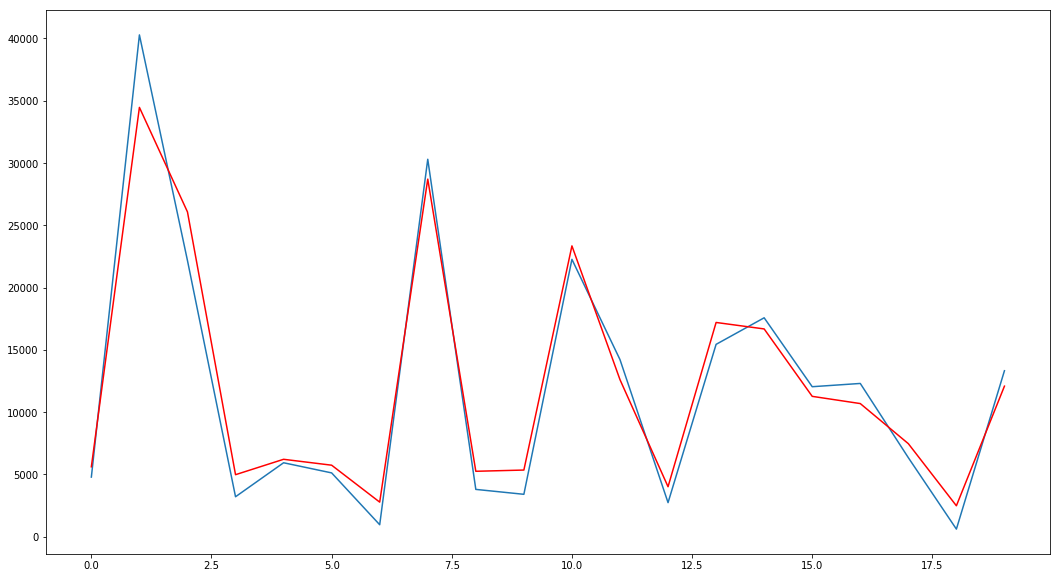

In [64]:
plt.figure(figsize=(18,10))
plt.plot(minmax.inverse_transform(test_y.reshape(-1,1)))
plt.plot(minmax.inverse_transform(predection.reshape(-1,1)), color= 'r')
plt.show()

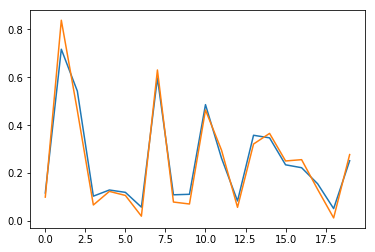

In [67]:
plt.plot(predection)
plt.plot(test_y)
plt.show()

In [68]:
pred_list = []

In [69]:
pred_list.append(X_train[-1])

In [70]:
pred_list = np.asarray(pred_list)

In [71]:
pred_list

array([[[0.66259841],
        [0.63064939],
        [0.56437706],
        [0.65168493],
        [0.7021702 ],
        [0.75786229],
        [0.75994502],
        [0.83854709],
        [0.81638689],
        [0.763444  ],
        [0.75998667],
        [0.80884742],
        [0.91373349],
        [0.94584913],
        [1.        ]]])

In [72]:
# Next 10 days predection
for i in range(10):
    pred_data = pred_list[0,i:]
    pred_data = pred_data.reshape(1,15,1)
    pred = model.predict(pred_data)
    pred_list = np.append(pred_list, pred)
    pred_list = pred_list.reshape(1,pred_list.shape[0],1)

In [81]:
pred_list

array([[[0.66259841],
        [0.63064939],
        [0.56437706],
        [0.65168493],
        [0.7021702 ],
        [0.75786229],
        [0.75994502],
        [0.83854709],
        [0.81638689],
        [0.763444  ],
        [0.75998667],
        [0.80884742],
        [0.91373349],
        [0.94584913],
        [1.        ],
        [0.93240523],
        [0.95580792],
        [0.9820621 ],
        [1.01144028],
        [1.03676593],
        [1.06017697],
        [1.08180785],
        [1.10402036],
        [1.12380087],
        [1.14533854]]])

In [74]:
pred_list.shape

(1, 25, 1)

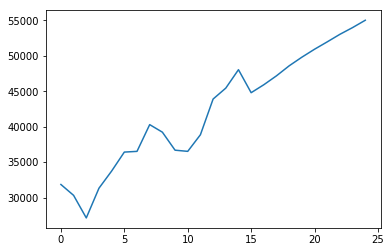

In [75]:
plt.plot(minmax.inverse_transform(pred_list.reshape(-1,1)))
plt.show()